# 편의를 위한 함수들

## 데이터 다운로드

In [1]:
import pandas as pd


def load_data(rate=0.75):
    with open("/content/drive/MyDrive/Colab Notebooks/Machine-Learning-without-Framework/ratings.txt", "r", encoding="utf-8") as f:
        c = f.readlines()

    index1 = []
    data = []
    column = ['document', 'label']

    for i in c[1:]:
        has = i.strip('\n').split('\t')
        index1.append(int(has[0]))
        data.append([has[1], int(has[2])])

    newc = pd.DataFrame(data, index=index1, columns=column)
    newc = newc.sample(frac=1)
    amt = int(rate * len(newc))
    return newc[:amt], newc[amt:]


if __name__ == '__main__':
    train, test = load_data()
    print(train)
    print(test)


                                                   document  label
4449273                                       바이올린 소리가 아름답다      1
3563687                 이거 진짜 재미없다.기존 시리즈와의 연계성도 초자연과학도 없다.      0
3563950                              별 반쪽도 아까운 신성록이 누구야? 웩!      0
10000384                                  아직 2.22까진 갈길이 남았다      0
6783056                                              감수성돋네요      1
...                                                     ...    ...
9511319   영화는 표현의 수단이지 판단의 단서가 되서는 안된다. 이 영화는 일방적으로 법을 몰...      0
9451997                              최고♡각 역할의 캐릭을 너무 잘살림,!!      1
7594043                                                   ㅋ      0
10005179                                   편견에 대한 한방이 있는 영화      1
9569589   오늘 악몽을 꿀꺼같다.. 너무잔인한 군부정권ㅡㅡ.. 지금 이렇게 자유롭게 표현할수있...      1

[150000 rows x 2 columns]
                                                   document  label
8569036                                   왜재미없다는건지 이해안감ㅎ...      1
10273548              김고은 의리로 보는것도 

## 모듈 설치 및 사용

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

In [ ]:
# %env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
# %%bash
# bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
# pip3 install /tmp/mecab-python-0.996

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from konlpy.tag import Okt, Kkma

okt = Okt()
Kkma = Kkma()

# 본 코드

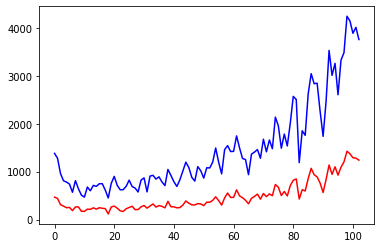

In [ ]:
train, test = load_data()

x = np.arange(103)
train_id = np.zeros(103)
test_id = np.zeros(103)

for i in train.index:
  train_id[i // 100000] += 1

for i in test.index:
  test_id[i // 100000] += 1

plt.plot(x, train_id, color='blue')
plt.plot(x, test_id, color='red')
plt.show()

In [ ]:
print(okt.morphs(train.iloc[1, 0]))
print(okt.pos(train.iloc[1, 0]))
print(okt.nouns(train.iloc[1, 0]))
print(list(train.iloc[1, 0]))

['나름', '괜찮은', '영화', '인데', '흥행', '은', '실패']
[('나름', 'Noun'), ('괜찮은', 'Adjective'), ('영화', 'Noun'), ('인데', 'Josa'), ('흥행', 'Noun'), ('은', 'Josa'), ('실패', 'Noun')]
['나름', '영화', '흥행', '실패']
['나', '름', ' ', '괜', '찮', '은', ' ', '영', '화', '인', '데', ' ', '흥', '행', '은', ' ', '실', '패']


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
print('단어 토큰화1 :',word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))